# Prosper Loan Exploratory Analysis

## by Amr Abutuleb

## Preliminary Wrangling


In [10]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

##Reading The Data

In [11]:
df = pd.read_csv('prosperLoanData.csv')
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,...,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,...,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.0,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


Number of Rows and Columns

In [12]:
df.shape

(113937, 81)

Printing the columns and Checking for any Missing Values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

There are many variables in this dataset and thus we choose only the columns that we think might be effective.

In [14]:
cols = ['Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors',
        'BorrowerState']
loan_df = df[cols]
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   EstimatedEffectiveYield    84853 non-null   float64
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ProsperRating (numeric)    84853 non-null   float64
 6   ProsperRating (Alpha)      84853 non-null   object 
 7   ProsperScore               84853 non-null   float64
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   EmploymentStatus           111682 non-null  object 
 10  Occupation                 110349 non-null  object 
 11  EmploymentStatusDuration   106312 non-null  float64
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  IncomeVerifiable           11

In [15]:
loan_df.describe()

,Term,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,Investors
count,113937.000000,84853.000000,113912.000000,113937.000000,84853.000000,84853.000000,113937.000000,106312.000000,1.139370e+05,113937.000000,113937.000000,105383.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.168661,0.218828,0.192764,4.072243,5.950067,2.774209,96.071582,5.608026e+03,272.475783,0.048027,0.275947,8337.01385,0.998584,80.475228
std,10.436212,0.068467,0.080364,0.074818,1.673227,2.376501,3.996797,94.480605,7.478497e+03,192.697812,0.332353,0.551759,6245.80058,0.017919,103.239020
min,12.000000,-0.182700,0.006530,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1000.00000,0.700000,1.000000
25%,36.000000,0.115670,0.156290,0.134000,3.000000,4.000000,1.000000,26.000000,3.200333e+03,131.620000,0.000000,0.140000,4000.00000,1.000000,2.000000
50%,36.000000,0.161500,0.209760,0.184000,4.000000,6.000000,1.000000,67.000000,4.666667e+03,217.740000,0.000000,0.220000,6500.00000,1.000000,44.000000
75%,36.000000,0.224300,0.283810,0.250000,5.000000,8.000000,3.000000,137.000000,6.825000e+03,371.580000,0.000000,0.320000,12000.00000,1.000000,115.000000
max,60.000000,0.319900,0.512290,0.497500,7.000000,11.000000,20.000000,755.000000,1.750003e+06,2251.510000,39.000000,10.010000,35000.00000,1.012500,1189.000000


As Some of the Rows have missing values the right thing to do here is to fill those values but to simplify the work and also because this project focuses focuses more on the visualization part, we drop the rows that has any missing values.

In [16]:
loan_df = loan_df.dropna()
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Term                       76216 non-null  int64  
 1   LoanStatus                 76216 non-null  object 
 2   EstimatedEffectiveYield    76216 non-null  float64
 3   BorrowerAPR                76216 non-null  float64
 4   BorrowerRate               76216 non-null  float64
 5   ProsperRating (numeric)    76216 non-null  float64
 6   ProsperRating (Alpha)      76216 non-null  object 
 7   ProsperScore               76216 non-null  float64
 8   ListingCategory (numeric)  76216 non-null  int64  
 9   EmploymentStatus           76216 non-null  object 
 10  Occupation                 76216 non-null  object 
 11  EmploymentStatusDuration   76216 non-null  float64
 12  IsBorrowerHomeowner        76216 non-null  bool   
 13  IncomeVerifiable           76216 non-null  bo

In [17]:
loan_df.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_Alpha', 
                        'ProsperRating (numeric)': 'ProsperRating_Numeric',
                        'ListingCategory (numeric)' : 'ListingCategory_Numeric'
                       }, inplace=True)
loan_df['Term'] = loan_df['Term'].astype('category')

In [18]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Term                      76216 non-null  category
 1   LoanStatus                76216 non-null  object  
 2   EstimatedEffectiveYield   76216 non-null  float64 
 3   BorrowerAPR               76216 non-null  float64 
 4   BorrowerRate              76216 non-null  float64 
 5   ProsperRating_Numeric     76216 non-null  float64 
 6   ProsperRating_Alpha       76216 non-null  object  
 7   ProsperScore              76216 non-null  float64 
 8   ListingCategory_Numeric   76216 non-null  int64   
 9   EmploymentStatus          76216 non-null  object  
 10  Occupation                76216 non-null  object  
 11  EmploymentStatusDuration  76216 non-null  float64 
 12  IsBorrowerHomeowner       76216 non-null  bool    
 13  IncomeVerifiable          76216 non-null  boo

The above data set is the final dataset that we are going to explore. We converted the column term from being an int column to a category and renamed the columns that had wrong naming and dropped all the rows with missing values. Now we answer the three questions in the template before moving into Univariate Exploration

###**What is the Structure of your dataset ??**
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. What we did is focus only on the variables that we think will be effective and also dropped any loans that had any missing values.

We ended up with a dataset of 76,216 loans and 22 variables that we will focus on in our work.

###**What is/are the main feature(s) of interest in your dataset?**
We are mostly interested in the variables that affect the LoanStatus.

###**What features in the dataset do you think will help support your investigation into your feature(s) of interest?**

I think that the LoanStatus will mostly be affected by the BorrowerState and the IncomeRange and maybe what kind of Occupation the Borrower has might affect as well. I'll try to explore most of the variables that i think will affect the LoanStatus to get the best outcome of this data analysis process.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare to look at relationships between variables.

###We start by checking the Categorical variables to see who's ordinal and who's nominal and get a better understanding of the categorical variables

In [19]:
loan_df['ProsperRating_Alpha'].value_counts()


C     16499
B     14379
A     13490
D     12629
E      8443
HR     5680
AA     5096
Name: ProsperRating_Alpha, dtype: int64

In [20]:
loan_df['IncomeRange'].value_counts()

$50,000-74,999    23692
$25,000-49,999    21421
$100,000+         13977
$75,000-99,999    13547
$1-24,999          3578
Not employed          1
Name: IncomeRange, dtype: int64

Based on the Exploration of both ProsperRating_Alpha and IncomeRange, it seems that these are a ordinal categorical variables and thus we have to order them to get good insights. 

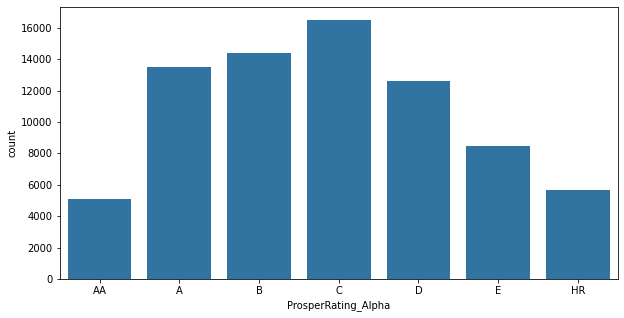

In [21]:
plt.figure(figsize = [10, 5]) 
ProsperRating_Alpha_classes = ['AA','A', 'B', 'C', 'D', 'E', 'HR']
IncomeRange_classes = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRating_Alpha_classes);
loan_df['ProsperRating_Alpha'] = loan_df['ProsperRating_Alpha'].astype(vclasses);
vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRange_classes);
loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(vclasses_1);
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'ProsperRating_Alpha', color = base_color);

We can see here that 'AA' rating is the rating wiht lesser count

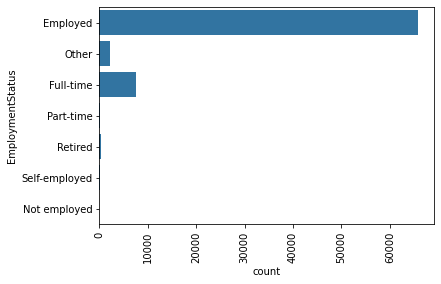

In [22]:
sb.countplot(data = loan_df, y = 'EmploymentStatus', color = base_color);
plt.xticks(rotation = 90);

Most of the Borrowers are Employed which makes sense.

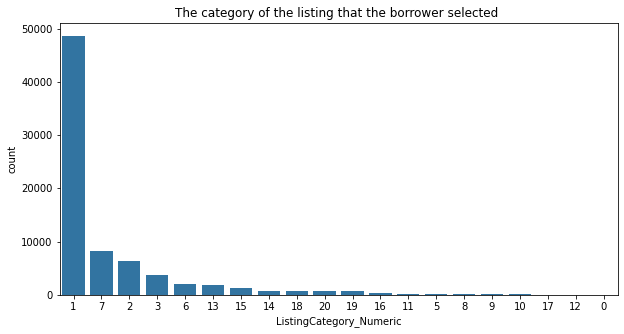

In [23]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("The category of the listing that the borrower selected ")
sb.countplot(data = loan_df, x = 'ListingCategory_Numeric', color = base_color,
             order = loan_df['ListingCategory_Numeric'].value_counts().index );

To understand what each number means, a list is provided mapping every number to a category:

0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans 

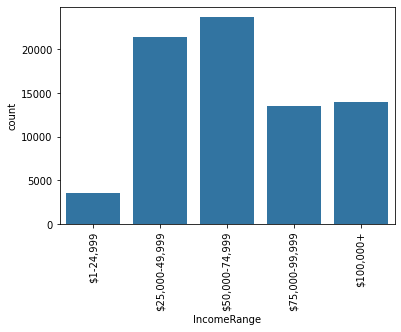

In [24]:
sb.countplot(data = loan_df, x = 'IncomeRange', color = base_color);
plt.xticks(rotation = 90);

Most of the Borrowers have an income range of \$50,000 to \$75,000.

In [25]:
loan_df_1 = loan_df[loan_df['IncomeRange'] != 'Not employed']

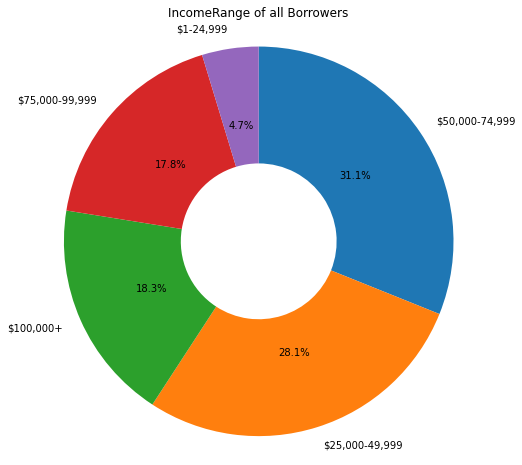

In [26]:
plt.figure(figsize = [15, 8])
sorted_counts = loan_df_1['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.6}, autopct   = '%.1f%%');
plt.title("IncomeRange of all Borrowers")
plt.axis('square');

This Provies another look at the income range. As it is shown, a Pie chart is more suitable to describe the incomeRange of the borrowes.

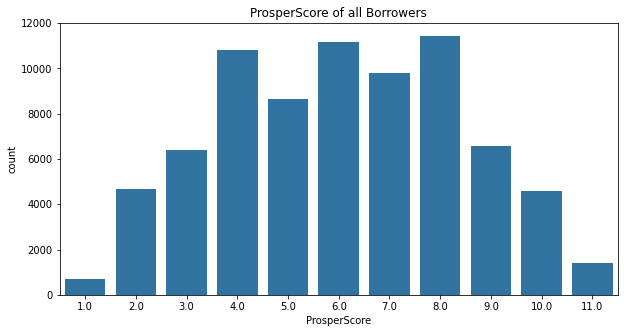

In [27]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'ProsperScore', color = base_color);
plt.title("ProsperScore of all Borrowers");

This countplot provide an insight about the ProperScore of the Borrowers.

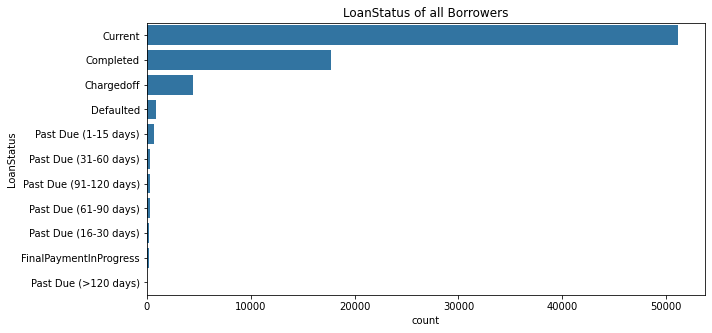

In [28]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("LoanStatus of all Borrowers")
sb.countplot(data = loan_df, y = 'LoanStatus', color = base_color,
             order = loan_df['LoanStatus'].value_counts().index);

Our Final and most important categorical variable is the LoanStatus, in which we can see that most loans have a status of 'Current'.

###**Categorical Variable Analysis**
<ol>
<li>Loans with "AA" category are with lesser count</li>
<li>The top 2 loan consideration reasons are 1 - Debt Consolidation, 2 - Home Improvement</li>
<li>LoanStatus of most Borrowers are with current and completed state</li>
<li>EmploymentStatus of most Borrowers are with Employed State</li>
<li>Top IncomeRange of all Borrowers are within $50,000-74,999</li>
<li>Majority of the borrowers are with a rating or score from 4 to 8</li>
</ol> 

###We now move on to some of the numeric variables to gain more insight

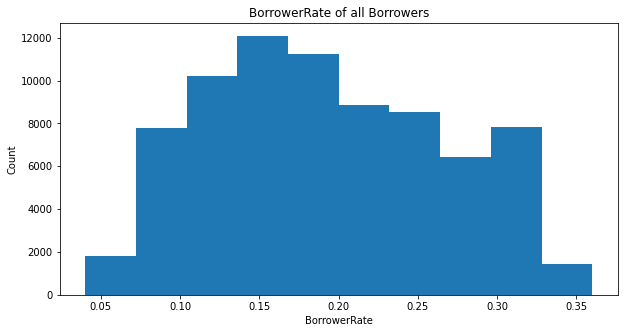

In [29]:
plt.figure(figsize = [10, 5]) 
plt.hist(data = loan_df, x = 'BorrowerRate');
plt.xlabel('BorrowerRate');
plt.ylabel('Count');
plt.title("BorrowerRate of all Borrowers");

We can see that most of the borrowers have a rate between 0.7 to 0.32 and the rating with the most count is 0.15.

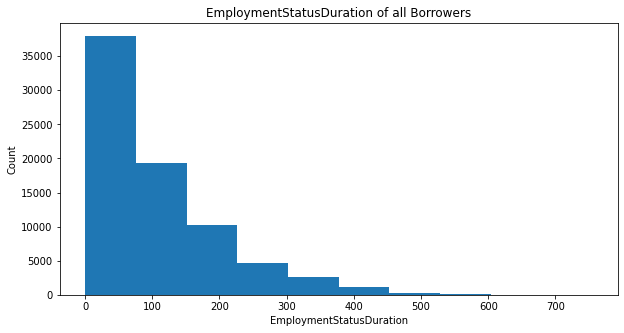

In [30]:
plt.figure(figsize=[10,5])
plt.hist(data = loan_df, x = 'EmploymentStatusDuration');
plt.xlabel('EmploymentStatusDuration');
plt.ylabel('Count');
plt.title("EmploymentStatusDuration of all Borrowers");

We can see that most of the borrowers have low EmploymentStatusDuration and the distribution is right skewed

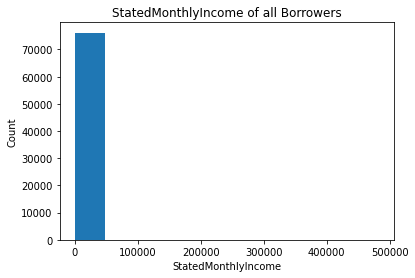

In [31]:
plt.hist(data = loan_df, x = 'StatedMonthlyIncome');
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

This Histogram doesn't really describe the StatedMonthlyIncome variable and because we think it's a very important variable we dive in deeper and do an axis transformation to explore this variable.

In [32]:
(loan_df['StatedMonthlyIncome'].describe())

count     76216.000000
mean       6002.833586
std        5110.743506
min           0.250000
25%        3583.333333
50%        5041.666667
75%        7250.000000
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

In [33]:
np.log10(loan_df['StatedMonthlyIncome'].describe())

count    4.882046
mean     3.778356
std      3.708484
min     -0.602060
25%      3.554287
50%      3.702574
75%      3.860338
max      5.684247
Name: StatedMonthlyIncome, dtype: float64

Base on this two describe blocks we plot the two histograms to compare between their distributions.

In [34]:
loan_df_sub = loan_df[loan_df['StatedMonthlyIncome'] <= 25000]

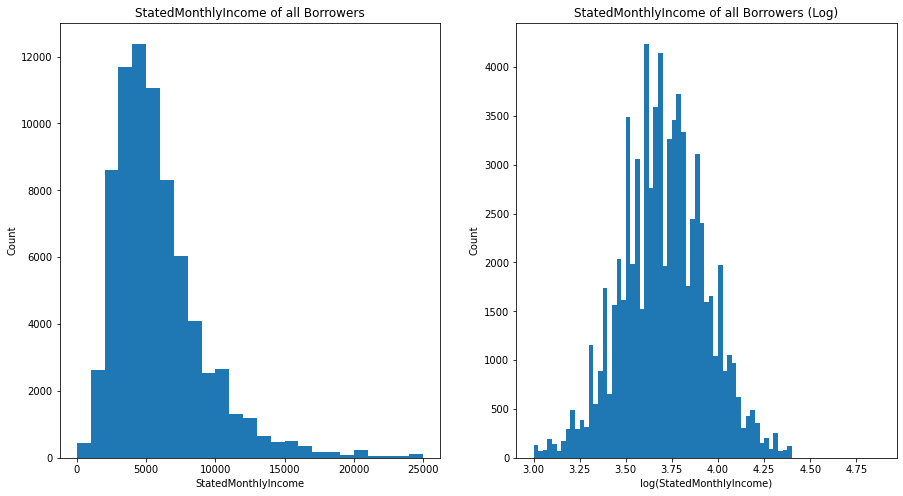

In [35]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data =loan_df_sub, x = 'StatedMonthlyIncome', bins = bin_edges)
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df_sub['StatedMonthlyIncome']) # direct data transform
log_bin_edges = np.arange(3, log_data.max()+0.5, 0.025)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(StatedMonthlyIncome)');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers (Log)");

Without log transformation looks good on StatedMonthlyIncome

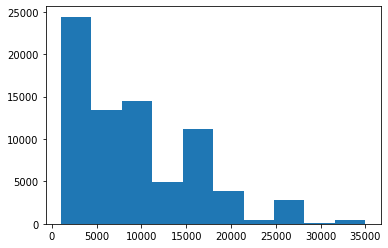

In [36]:
plt.hist(data = loan_df, x = 'LoanOriginalAmount');

We try to use log transformation again on LoanOriginalAmount to see if it can give us better insights.

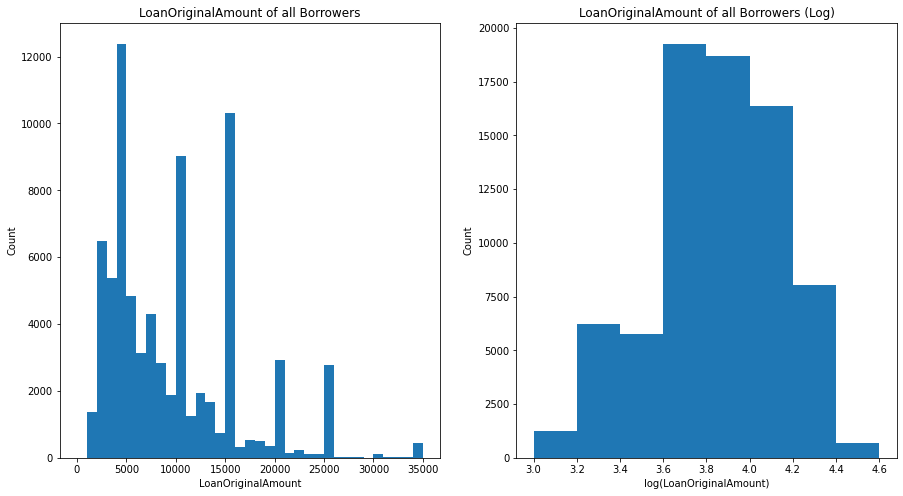

In [37]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data =loan_df, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df['LoanOriginalAmount']) # direct data transform
log_bin_edges = np.arange(3.0, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(LoanOriginalAmount)');
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers (Log)");

loan_df['LoanOriginalAmount_log'] = np.log10(loan_df['LoanOriginalAmount'])

The Log transformation looks much better and appears to have a normal distribution.

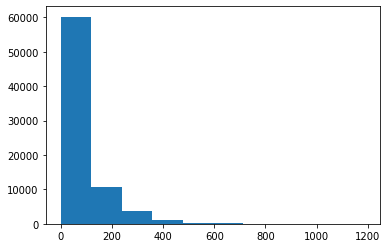

In [38]:
plt.hist(data = loan_df, x = 'Investors');

We can see here that this plot doesn't really provide any insights about the investors and based on that another log transformation is proposed.

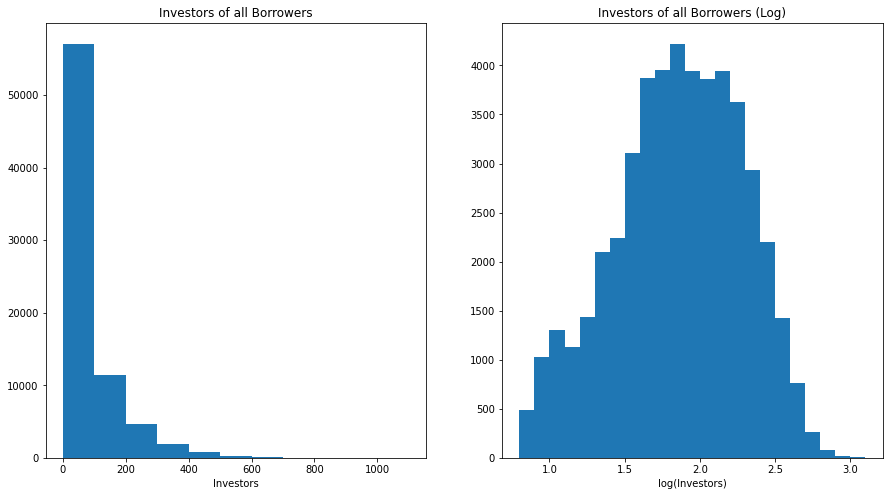

In [39]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df['Investors'].max()+10, 100)
plt.hist(data =loan_df, x = 'Investors', bins = bin_edges)
plt.xlabel('Investors')
plt.title("Investors of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df['Investors']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Investors)')
plt.title("Investors of all Borrowers (Log)");

loan_df['Investors_log'] = np.log10(loan_df['Investors'])

Again, the Log transformation appears to have better distribution than the normal axis. 

###**Numerical Variable Analysis**
<ol>
<li>he Borrower's interest rate for this loan. The borrowers rate follow an approximately unimodal distribution, with the peak around 0.15.</li>
<li>The monthly income the borrower stated at the time the listing was created. Monthly Income will definitely be right skewed since very few people will be having a higher salary. So based on that and also the intial plot that we had, the outliers were removed and log axis transformation was performed. Majority of the borrowers are having a salary with less than 10000 USD and the peak is observed at 5000 USD</li>
<li>The origination amount of the loan.Now this is interesting. Here we see that the distribution is a right skewed with multiple peaks observed at 4000 USD, 10000 USD and 15000 USD.</li>
<li>Majority of the investors that funded each loan are between 0 and 100</li>
</ol> 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In the numerical variables, there was some distributions that looked weird due to outliers like the number of investors funding each loan. Based on that, whenever an outlier was faced axis transformation was used to achieve a better looking distribution.

## Bivariate Exploration

In [40]:
loan_df.dtypes

Term                        category
LoanStatus                    object
EstimatedEffectiveYield      float64
BorrowerAPR                  float64
BorrowerRate                 float64
ProsperRating_Numeric        float64
ProsperRating_Alpha         category
ProsperScore                 float64
ListingCategory_Numeric        int64
EmploymentStatus              object
Occupation                    object
EmploymentStatusDuration     float64
IsBorrowerHomeowner             bool
IncomeVerifiable                bool
StatedMonthlyIncome          float64
MonthlyLoanPayment           float64
Recommendations                int64
DebtToIncomeRatio            float64
LoanOriginalAmount             int64
PercentFunded                float64
IncomeRange                 category
Investors                      int64
BorrowerState                 object
LoanOriginalAmount_log       float64
Investors_log                float64
dtype: object

In [41]:
numeric_vars = ['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
                'ProsperRating_Numeric', 'ProsperScore', 
                'ListingCategory_Numeric','EmploymentStatusDuration', 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount','PercentFunded', 'Investors', 'LoanOriginalAmount_log',
                 'Investors_log']

numeric_vars_1 = ['BorrowerRate',
                 'ProsperScore',                 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'LoanOriginalAmount', 'Investors' ,'LoanOriginalAmount_log',
                 'Investors_log']

categoric_vars = ['LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus', 'Occupation',
       'IncomeRange', 'BorrowerState', 'Term', 'IsBorrowerHomeowner']

We define the numeric and categorical variables of interest into new arrays to ease the analysis

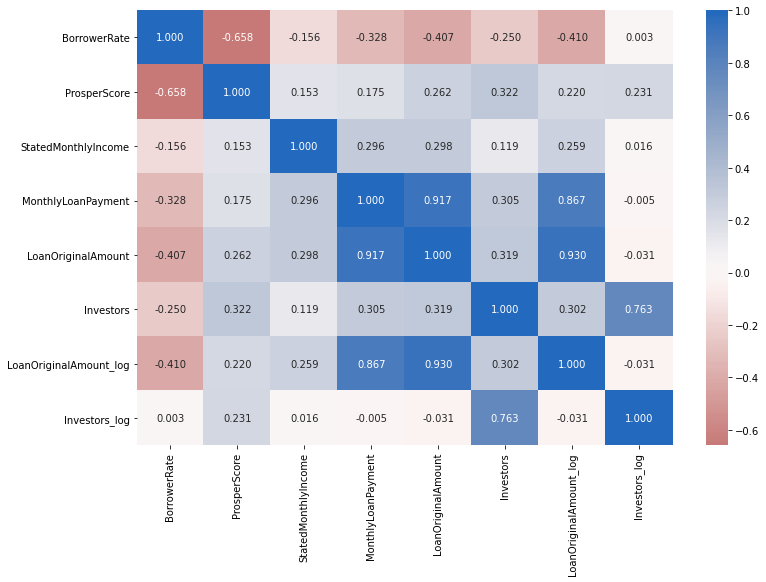

In [42]:
plt.figure(figsize = [12, 8])
sb.heatmap(loan_df[numeric_vars_1].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

We observe the heat map of the numerical variables wo that we can focus on the strong bivariate relations.

Now we focus on the relation between numeric and categorical variables

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid pos

<Figure size 720x720 with 0 Axes>

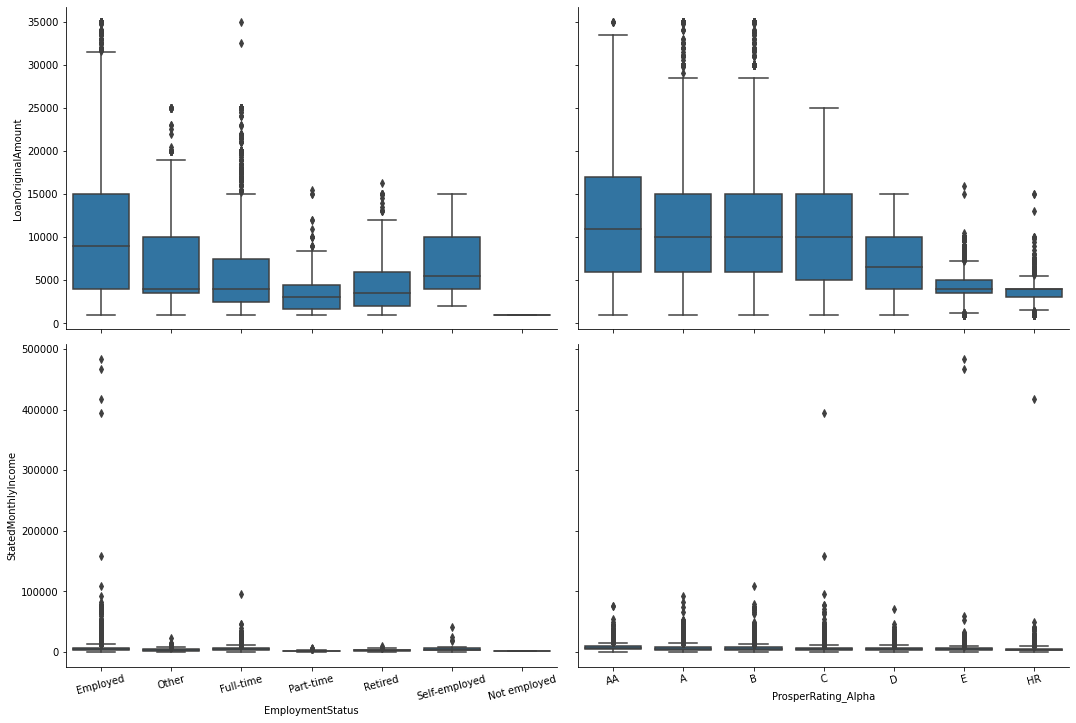

In [45]:
# plot matrix of numeric features against categorical features.

categoric_vars_1 = ['EmploymentStatus', 'ProsperRating_Alpha']

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """

    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 15)
    

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_df, y_vars = [ 'LoanOriginalAmount', 'StatedMonthlyIncome'], 
                x_vars = categoric_vars_1, size = 5, aspect = 1.5);

g.map(boxgrid);
plt.xticks(rotation = 15);
plt.show();

Text(0.5, 1.0, 'Income Range vs Loan Amount')

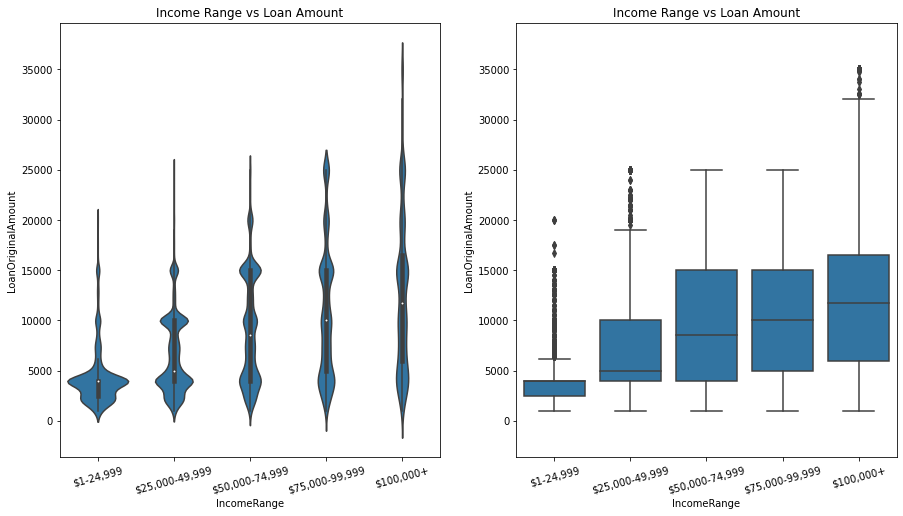

In [46]:
loan_df_sub = loan_df[(loan_df['StatedMonthlyIncome'] <= 10000) ]
loan_df_sub = loan_df_sub[loan_df_sub['IncomeRange'] != 'Not employed']


plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

We observe the relation between IncomeRange and LoanOriginalAmount in both a boxplot and a violinplot

Finally, we observe the relation between the different categorical variables that we have 

Text(0.5, 1.0, 'Count of Applicants w.r.t LoanStatus and HomeownerStatus')

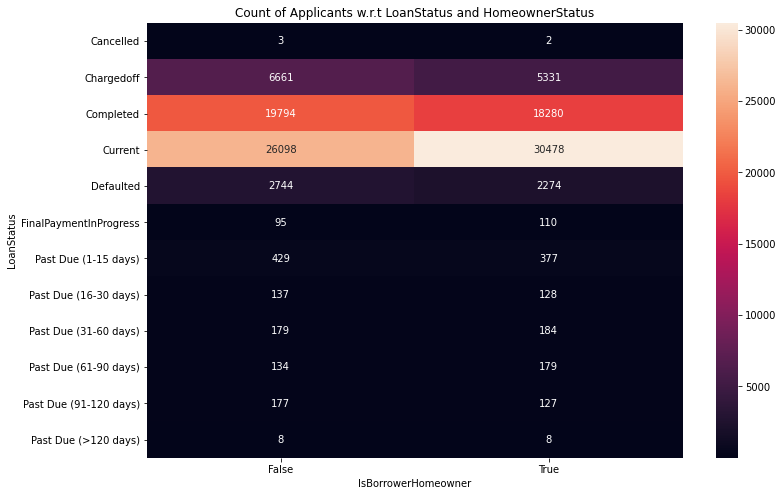

In [47]:
plt.figure(figsize = [12, 8])
ct_counts = df.groupby(['IsBorrowerHomeowner', 'LoanStatus']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'IsBorrowerHomeowner', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd');
plt.title('Count of Applicants w.r.t LoanStatus and HomeownerStatus')

We finally observe the relation between our categorical variables before proceeding with our bivariate insights

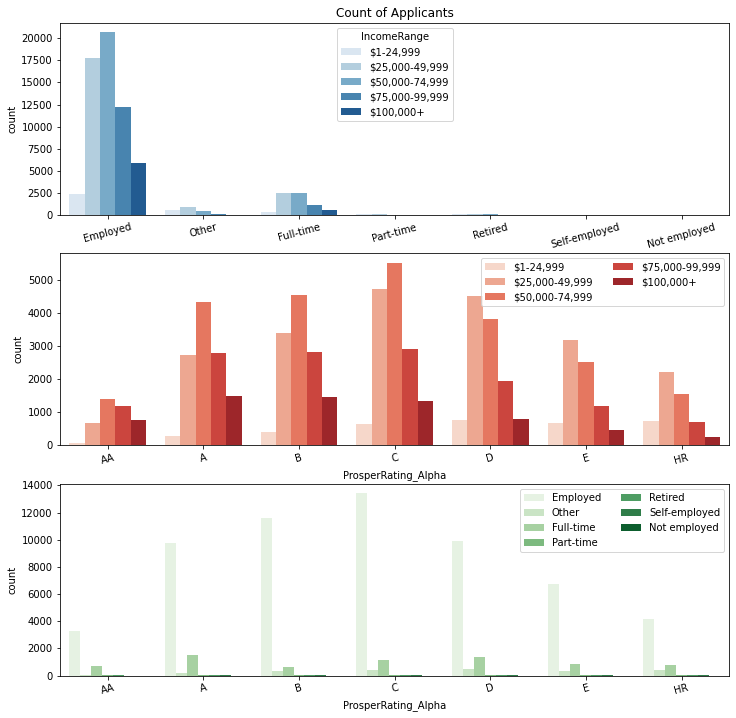

In [48]:
# since there's only three subplots to create, using the full data should be fine.
categoric_vars = ['EmploymentStatus', 'ProsperRating_Alpha', 'IncomeRange']

plt.figure(figsize = [12, 12])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = loan_df_sub, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation = 15)
plt.title('Count of Applicants')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'IncomeRange', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)


# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)


plt.show()

###Complete Bivariate Analysis
<ol>
<li>Loan original amount and monthly loan payment is highly correlated and it is expected. Borrowers interest rate and proper score are highly negatively correlated as well as Borrower interest rate and loanamount are negatively correlated.</li>
<li>Majority of the borrowers with highest loan amount are taken by Employed, which makes sense because an employed person is well suited to get a loan. This is followed by others and fulltime employees</li>
<li>The range of the salaries stated is higher for employed borrowers.</li>
<li>LoanOriginalAmount is highest for A and B Prosper ratings, when compared with income range - it is following a normal or expected trend that more salary borrowers are having higher loanoriginalamount</li>
<li>LoanStatus with current and completed have own homes when they applied for loans</li>
<li>Majority of the loan applicants are from 50K to 75K range with emloyeed status and these employees fall under the rating of AA, A, B and C</li> 
</ol> 

## Multivariate Exploration



We start this exploring step by looking at the different relations between our variables if interest and then move on to ask a couple of questions and answer them using the different visulaization techniques.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


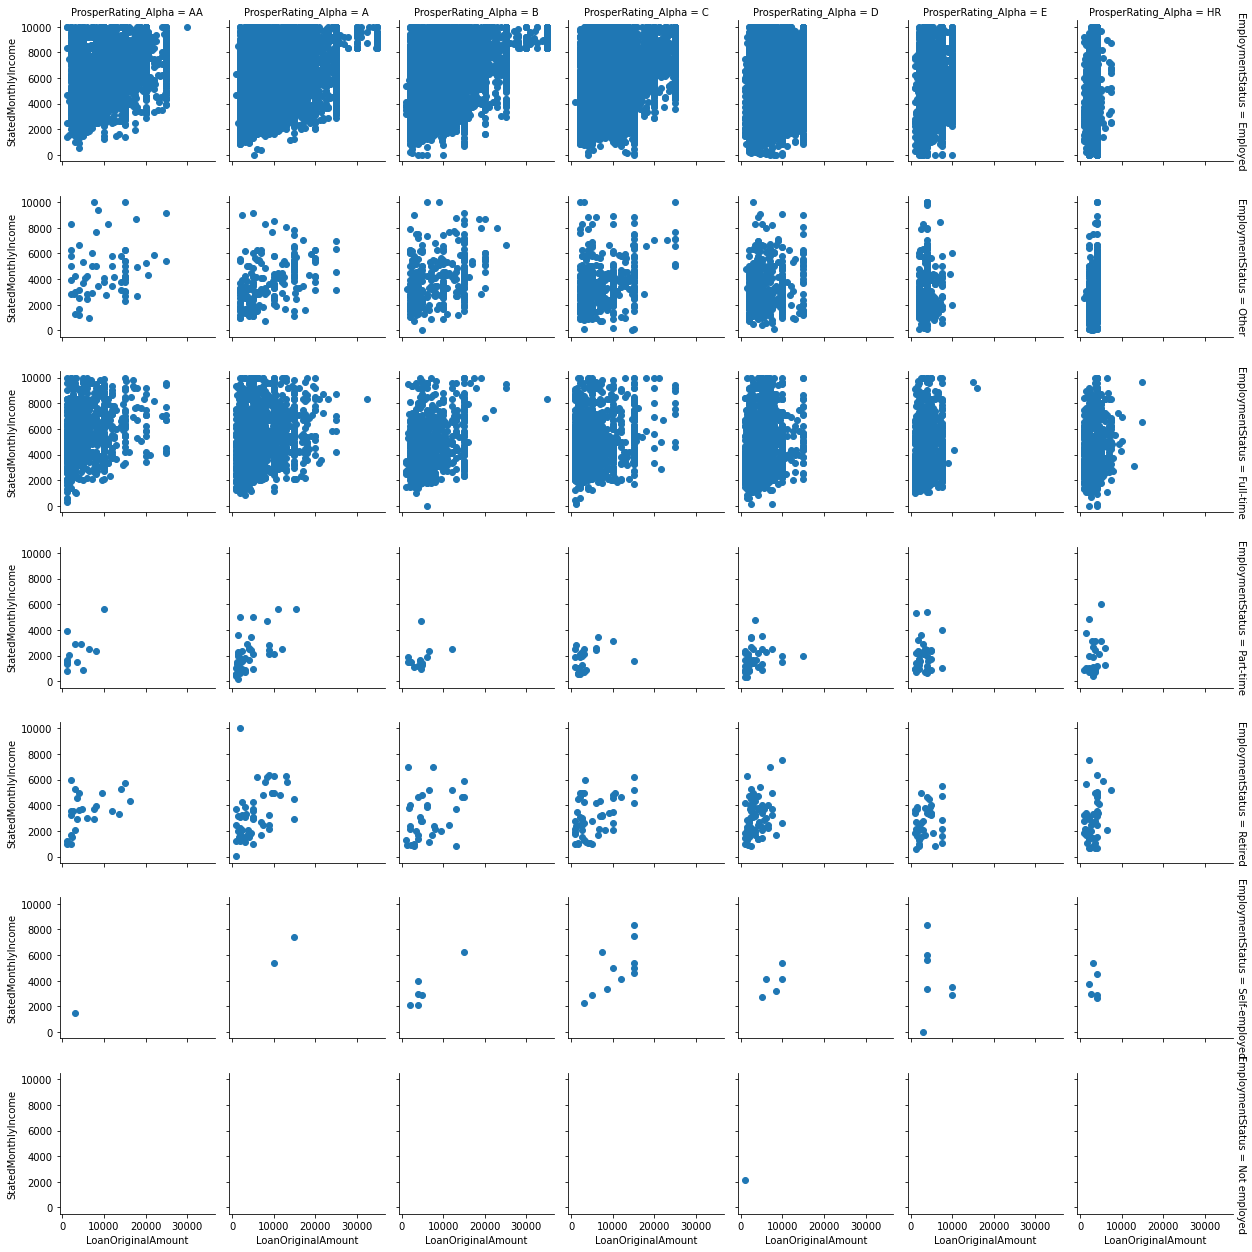

In [49]:
g = sb.FacetGrid(data = loan_df_sub, col = 'ProsperRating_Alpha', row = 'EmploymentStatus', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'StatedMonthlyIncome');

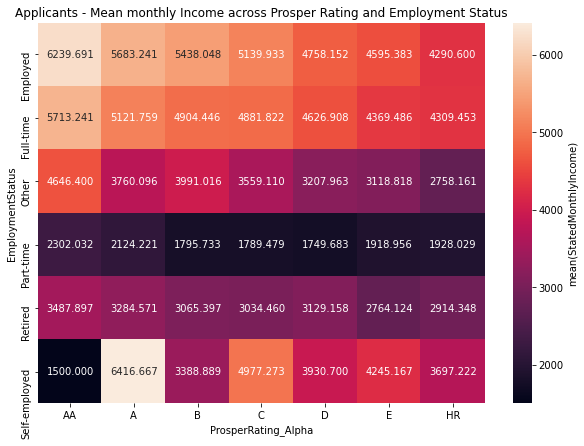

In [50]:
plt.figure(figsize = [10, 7])
loan_df_sub = loan_df_sub[loan_df_sub['EmploymentStatus'] != 'Not employed']

cat_means = loan_df_sub.groupby(['ProsperRating_Alpha', 'EmploymentStatus']).mean()['StatedMonthlyIncome']
cat_means = cat_means.reset_index(name = 'StatedMonthlyIncome_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'ProsperRating_Alpha',
                            values = 'StatedMonthlyIncome_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(StatedMonthlyIncome)'});
plt.title('Applicants - Mean monthly Income across Prosper Rating and Employment Status');

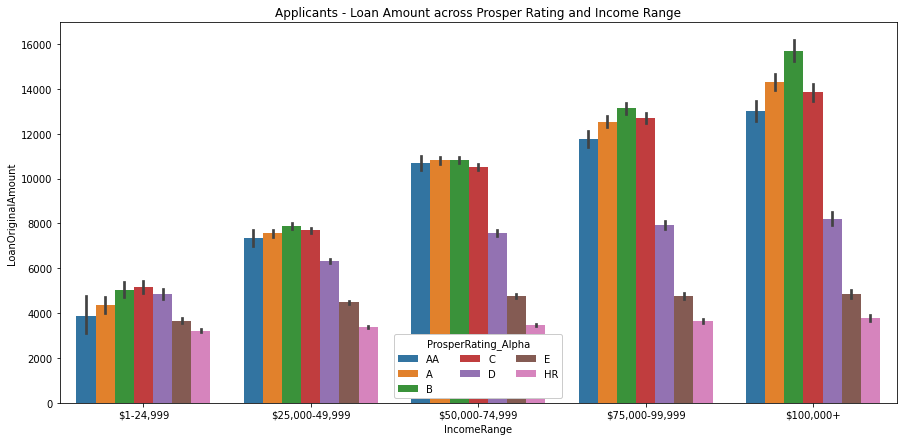

In [51]:
plt.figure(figsize = [15, 7])

ax = sb.barplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'ProsperRating_Alpha')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'ProsperRating_Alpha')
plt.title('Applicants - Loan Amount across Prosper Rating and Income Range');

###Does rating depend on the monhtly income and Employment status?

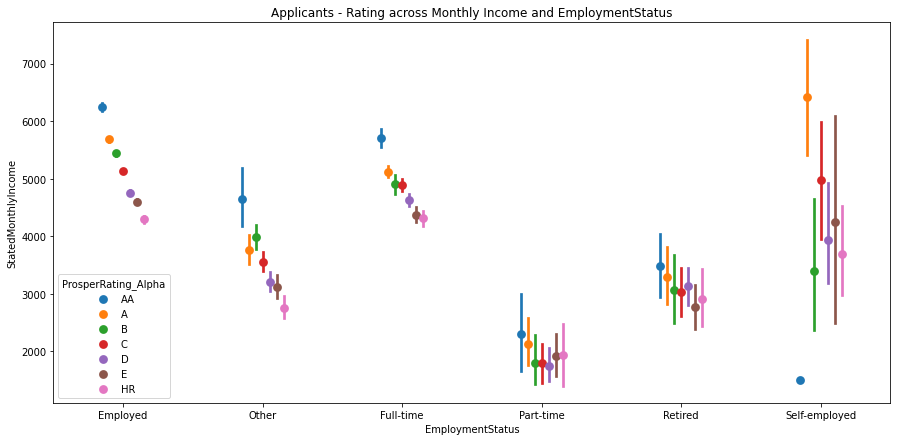

In [52]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_df_sub, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating_Alpha',
                  dodge = 0.3, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');

###Did homeowner status has impacted the ProsperRating and Borrower Interest Rate?

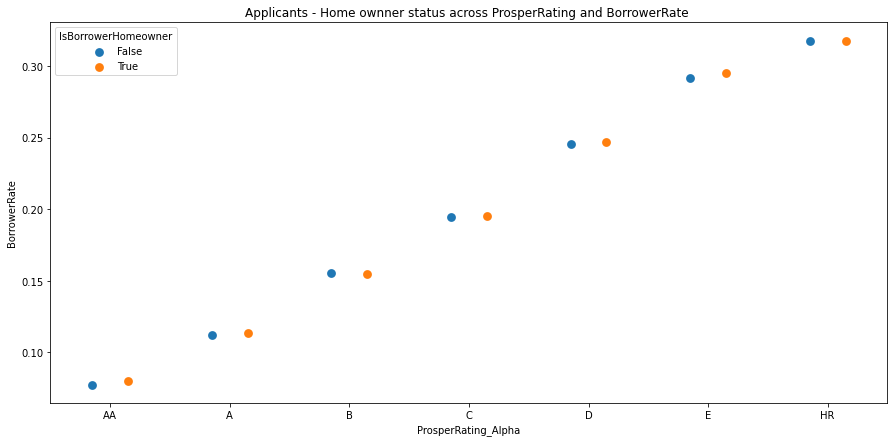

In [53]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_df_sub, x = 'ProsperRating_Alpha', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "");
plt.title('Applicants - Home ownner status across ProsperRating and BorrowerRate ');

###Complete Insights form the multivariate exploration step
<ol>
<li>Employed and full time employees have their mean salaries in higher range.</li>
<li>Majority of the borrowers are falling under prosper rating of B , irrespective of the income range.</li>
<li>The monthly income of borrowers are having higher values for employed, other and full time employment status with the prosper rating of AA, A and B.</li>
<li>For Applicants with prosper ratings from AA to D have the higher loan amount with increased salary.</li>
<li>Our Most important observation is that without homeowner tend to have a higher interest rate, and thus lower rating. However homeowner tends to have lower interest rate and higher rating. So we can safely say that homeowner is safest bet when gving a loan. We can also clearly observe that HR prosper rating applicants have higher interest rates</li>
<li>To conclude this analysis , We say that the loan approval status is heavily dependent on the applicant's information on IncomeRange, Homeownerstatus and employment status as our analysis showed that the LoanStatus is heavily dependant on these variables.</li> 
</ol> 

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration_template.ipynb'])

255